# Analysis of civil_comments dataset

In [2]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\kamal\transparentox\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ds = load_dataset("civil_comments")
df = ds["train"].to_pandas()

## Basic info

In [4]:
print(df.head())
print(df.info())

                                                text  toxicity  \
0  This is so cool. It's like, 'would you want yo...  0.000000   
1  Thank you!! This would make my life a lot less...  0.000000   
2  This is such an urgent design problem; kudos t...  0.000000   
3  Is this something I'll be able to install on m...  0.000000   
4               haha you guys are a bunch of losers.  0.893617   

   severe_toxicity  obscene  threat   insult  identity_attack  sexual_explicit  
0         0.000000      0.0     0.0  0.00000         0.000000              0.0  
1         0.000000      0.0     0.0  0.00000         0.000000              0.0  
2         0.000000      0.0     0.0  0.00000         0.000000              0.0  
3         0.000000      0.0     0.0  0.00000         0.000000              0.0  
4         0.021277      0.0     0.0  0.87234         0.021277              0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 8 columns):
 #   

## Checking class distribution

In [5]:
df["label"] = (df["toxicity"] >= 0.5).astype(int)
print(df["label"].value_counts(normalize=True))

label
0    0.920031
1    0.079969
Name: proportion, dtype: float64


92% of the comments are non toxic, whilst only 8% are toxic.

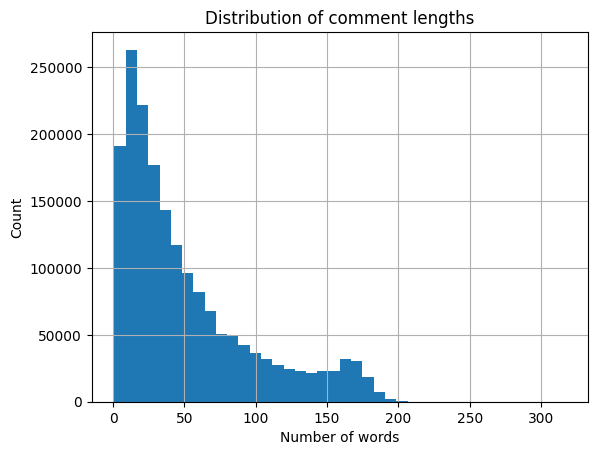

In [6]:
#Text length distribution
df["length"] = df["text"].str.split().str.len()
df["length"].hist(bins=40)
plt.xlabel("Number of words")
plt.ylabel("Count")
plt.title("Distribution of comment lengths")
plt.show()

## examples

In [7]:

print(df[df["label"]==1]["text"].sample(3).values)
print(df[df["label"]==0]["text"].sample(3).values)

["The Little Potato is gonna get tough with Trump?  Bwaa-haa-haa!  We're screwed."
 'What is the matter with you globeandmail? Do you expect me to ever pay for your newspaper again when you put out such baised stories.\n\nWhen a driver is intoxicated, they are  guity no matter what. When a young woman becomes intoxicated, everone else is guilty no matter what. Such a blanant double standard is systemic positive discrimation. Everything thay your saying is hypocritical!!'
 'Twitter world... 140 characters, knee jerk reactions, \nvs\nThe "life commitments" of Dr. King and Mahatma Gandhi. It isn\'t just the outward expression of a protest march, it is the inner foundation, the life commitment that bears fruit in outward expressions. What may be different today is who it is that undergoes "change".... Be the Change you want to see.  \nA next step... http://www.doonething.org/calendar/season.htm  Do One Thing for change... each day between January 30 the assassination of Gandhi and April 4 